 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [22]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [23]:
# Set the path for the whale data
whale_returns_csv = Path("/Users/aaronbsechler/Desktop/02-Homework_04-Pandas_Instructions_Starter_Code_Resources_whale_returns.csv")

# Read the data as a csv file, set the index to the date, make the date format uniform.

whale_returns = pd.read_csv(whale_returns_csv, parse_dates=['Date'], dayfirst=True, index_col = 'Date')

# Sort the data by date.

whale_returns.sort_index(inplace=True)

# Print the first five entries.

whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [24]:
# Count nulls

whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [25]:
# Drop nulls

whale_returns.dropna(inplace=True)

# Check to ensure they were dropped

whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [26]:
# Reading algorithmic returns

# Set path for algo returns

algo_returns_csv = Path("/Users/aaronbsechler/Desktop/02-Homework_04-Pandas_Instructions_Starter_Code_Resources_algo_returns.csv")

#read as csv file & set index by date, make the date uniform

algo_returns = pd.read_csv(algo_returns_csv, parse_dates=['Date'], dayfirst=True, index_col = 'Date')

# Sort the data by date.

algo_returns.sort_index(inplace=True)

# Print the first five entries.

algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [27]:
# Count nulls

algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [28]:
# Drop nulls

algo_returns.dropna(inplace=True)

# Check to ensure they were dropped

algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [29]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("/Users/aaronbsechler/Desktop/02-Homework_04-Pandas_Instructions_Starter_Code_Resources_sp500_history.csv")

sp500_returns = pd.read_csv(sp500_history_csv, parse_dates=['Date'], dayfirst=True, index_col = 'Date')

# Sort the data by date.

sp500_returns.sort_index(inplace=True)

# Print the first five entries.

sp500_returns.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [30]:
# Check Data Types
sp500_returns.dtypes

Close    object
dtype: object

In [31]:
# Fix Data Types first by removing the dollar sign.
sp500_returns['Close'] = sp500_returns['Close'].replace({'\$': ''}, regex=True).astype(float)

#check type to make sure that the closing price is now a float.

sp500_returns.dtypes


Close    float64
dtype: object

In [32]:
# Calculate Daily Returns

sp500_returns = sp500_returns.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [33]:
# Drop nulls

# First Count nulls

#algo_returns.isnull().sum()

# Dropo nulls and check

sp500_returns.dropna(inplace=True)

sp500_returns.isnull().sum()



Close    0
dtype: int64

In [34]:
# Rename Column

sp500_returns = sp500_returns.rename(columns={'Close': 'S&P 500'})

#check

sp500_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [52]:
# Concatenate all DataFrames into a single DataFrame

complete_df = pd.concat([whale_returns, algo_returns, sp500_returns], axis='columns', join="outer")

# Drop all entries with null values so that all the data beings on the same date.

complete_df.dropna(inplace=True)

# Print first five

complete_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

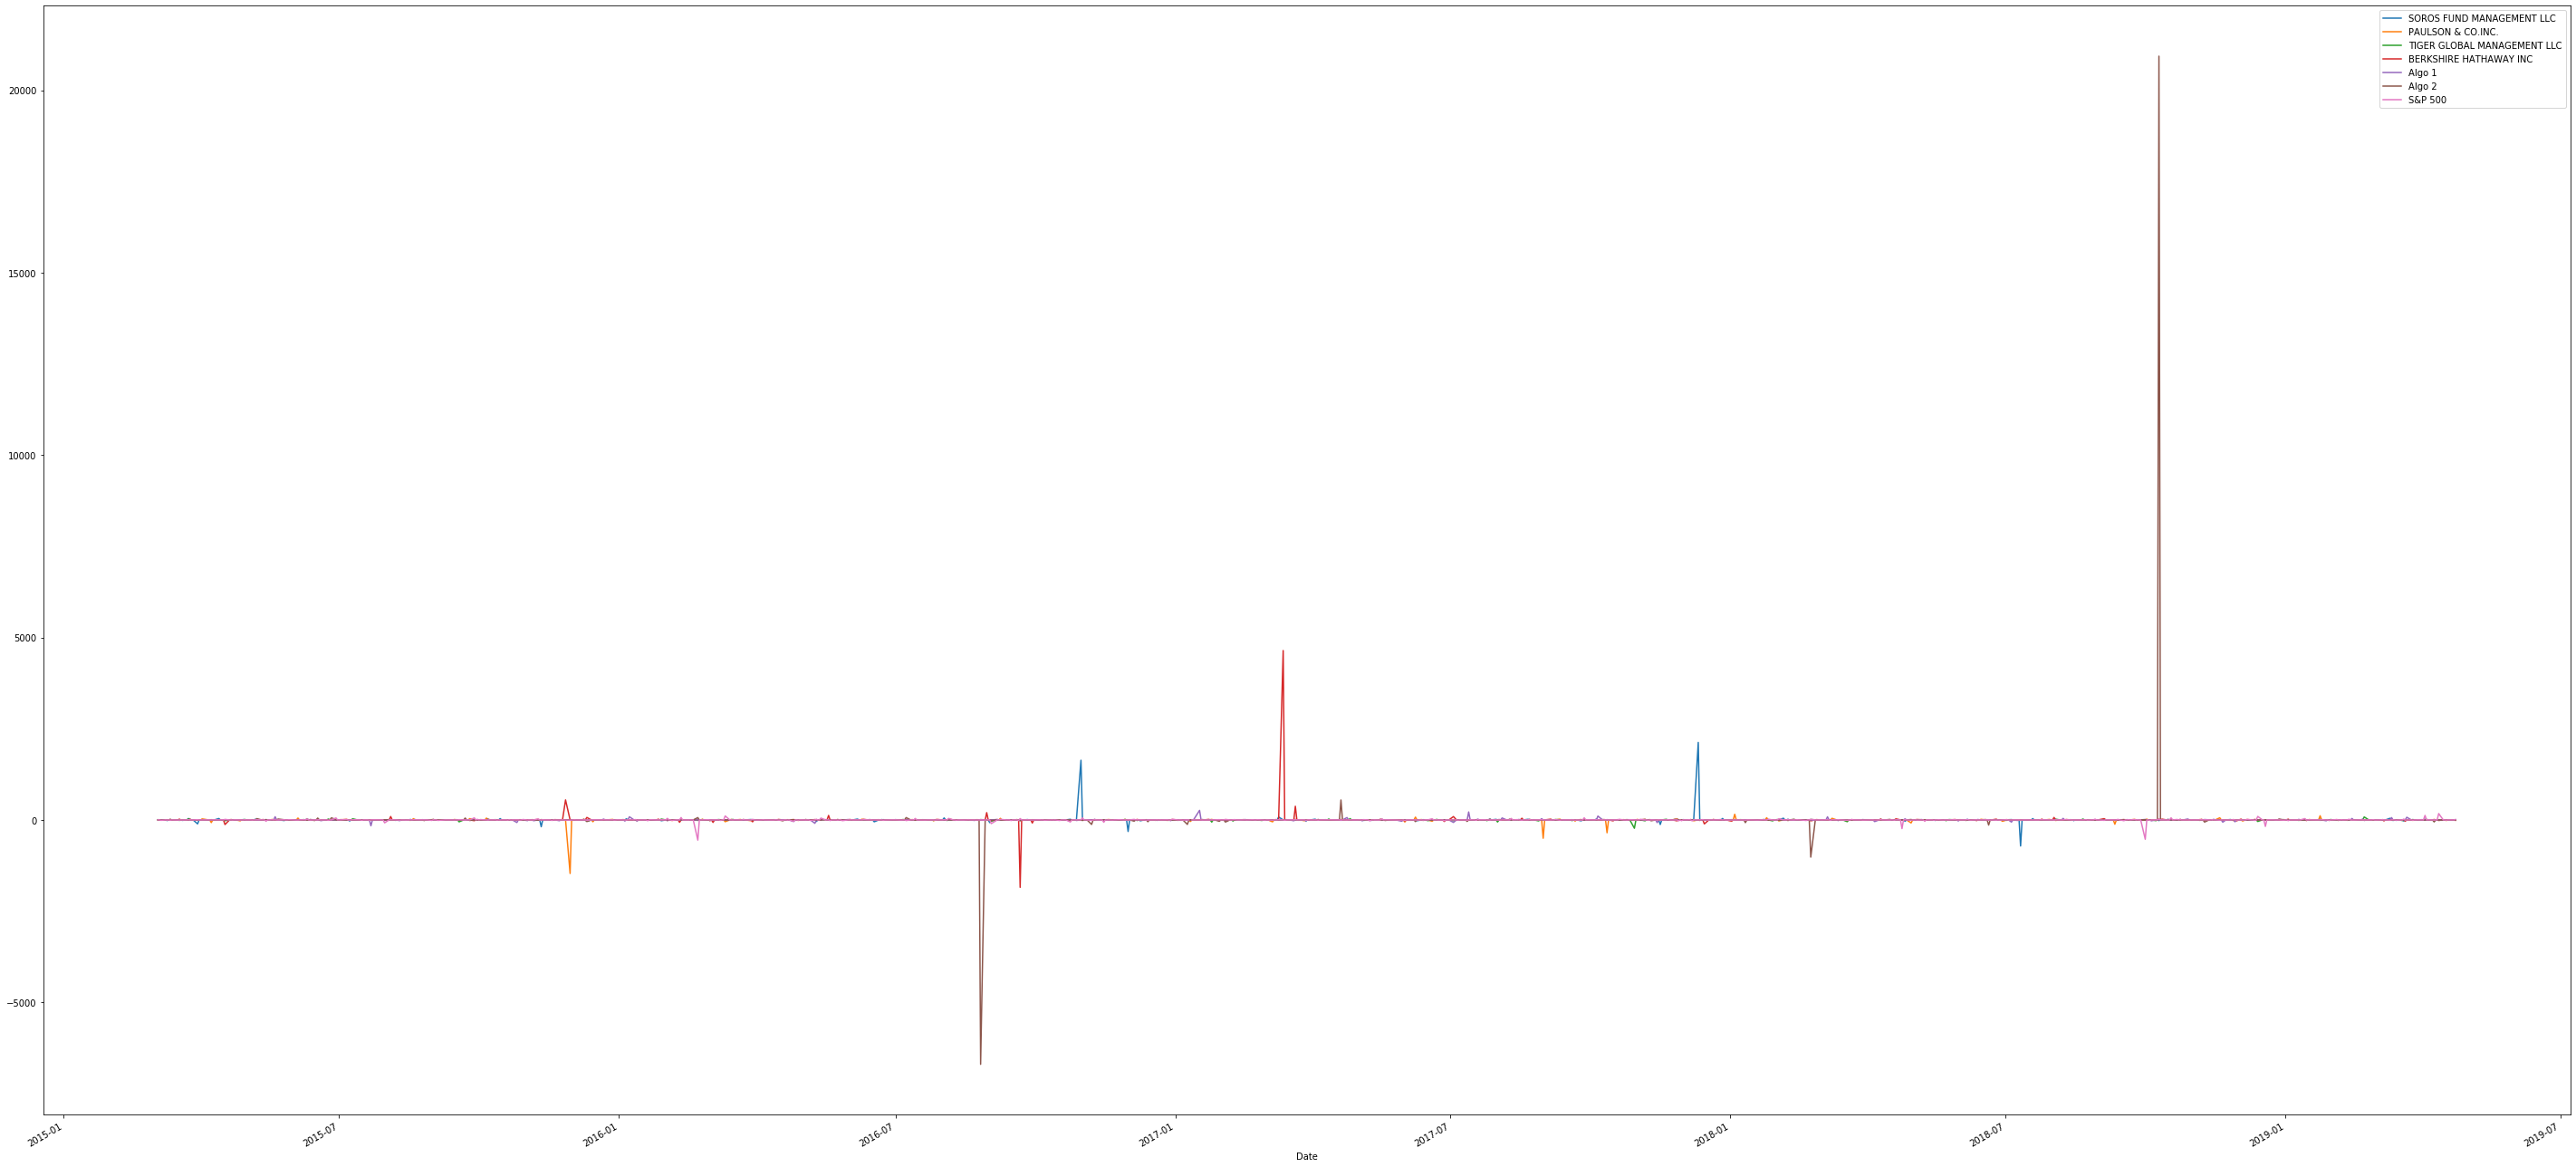

In [131]:
# Use the daily returns function to calculate the daily returns

daily_returns = complete_df.pct_change()

# Plot the daily returns

daily_returns.plot()
plt.gcf().set_size_inches(50, 25)

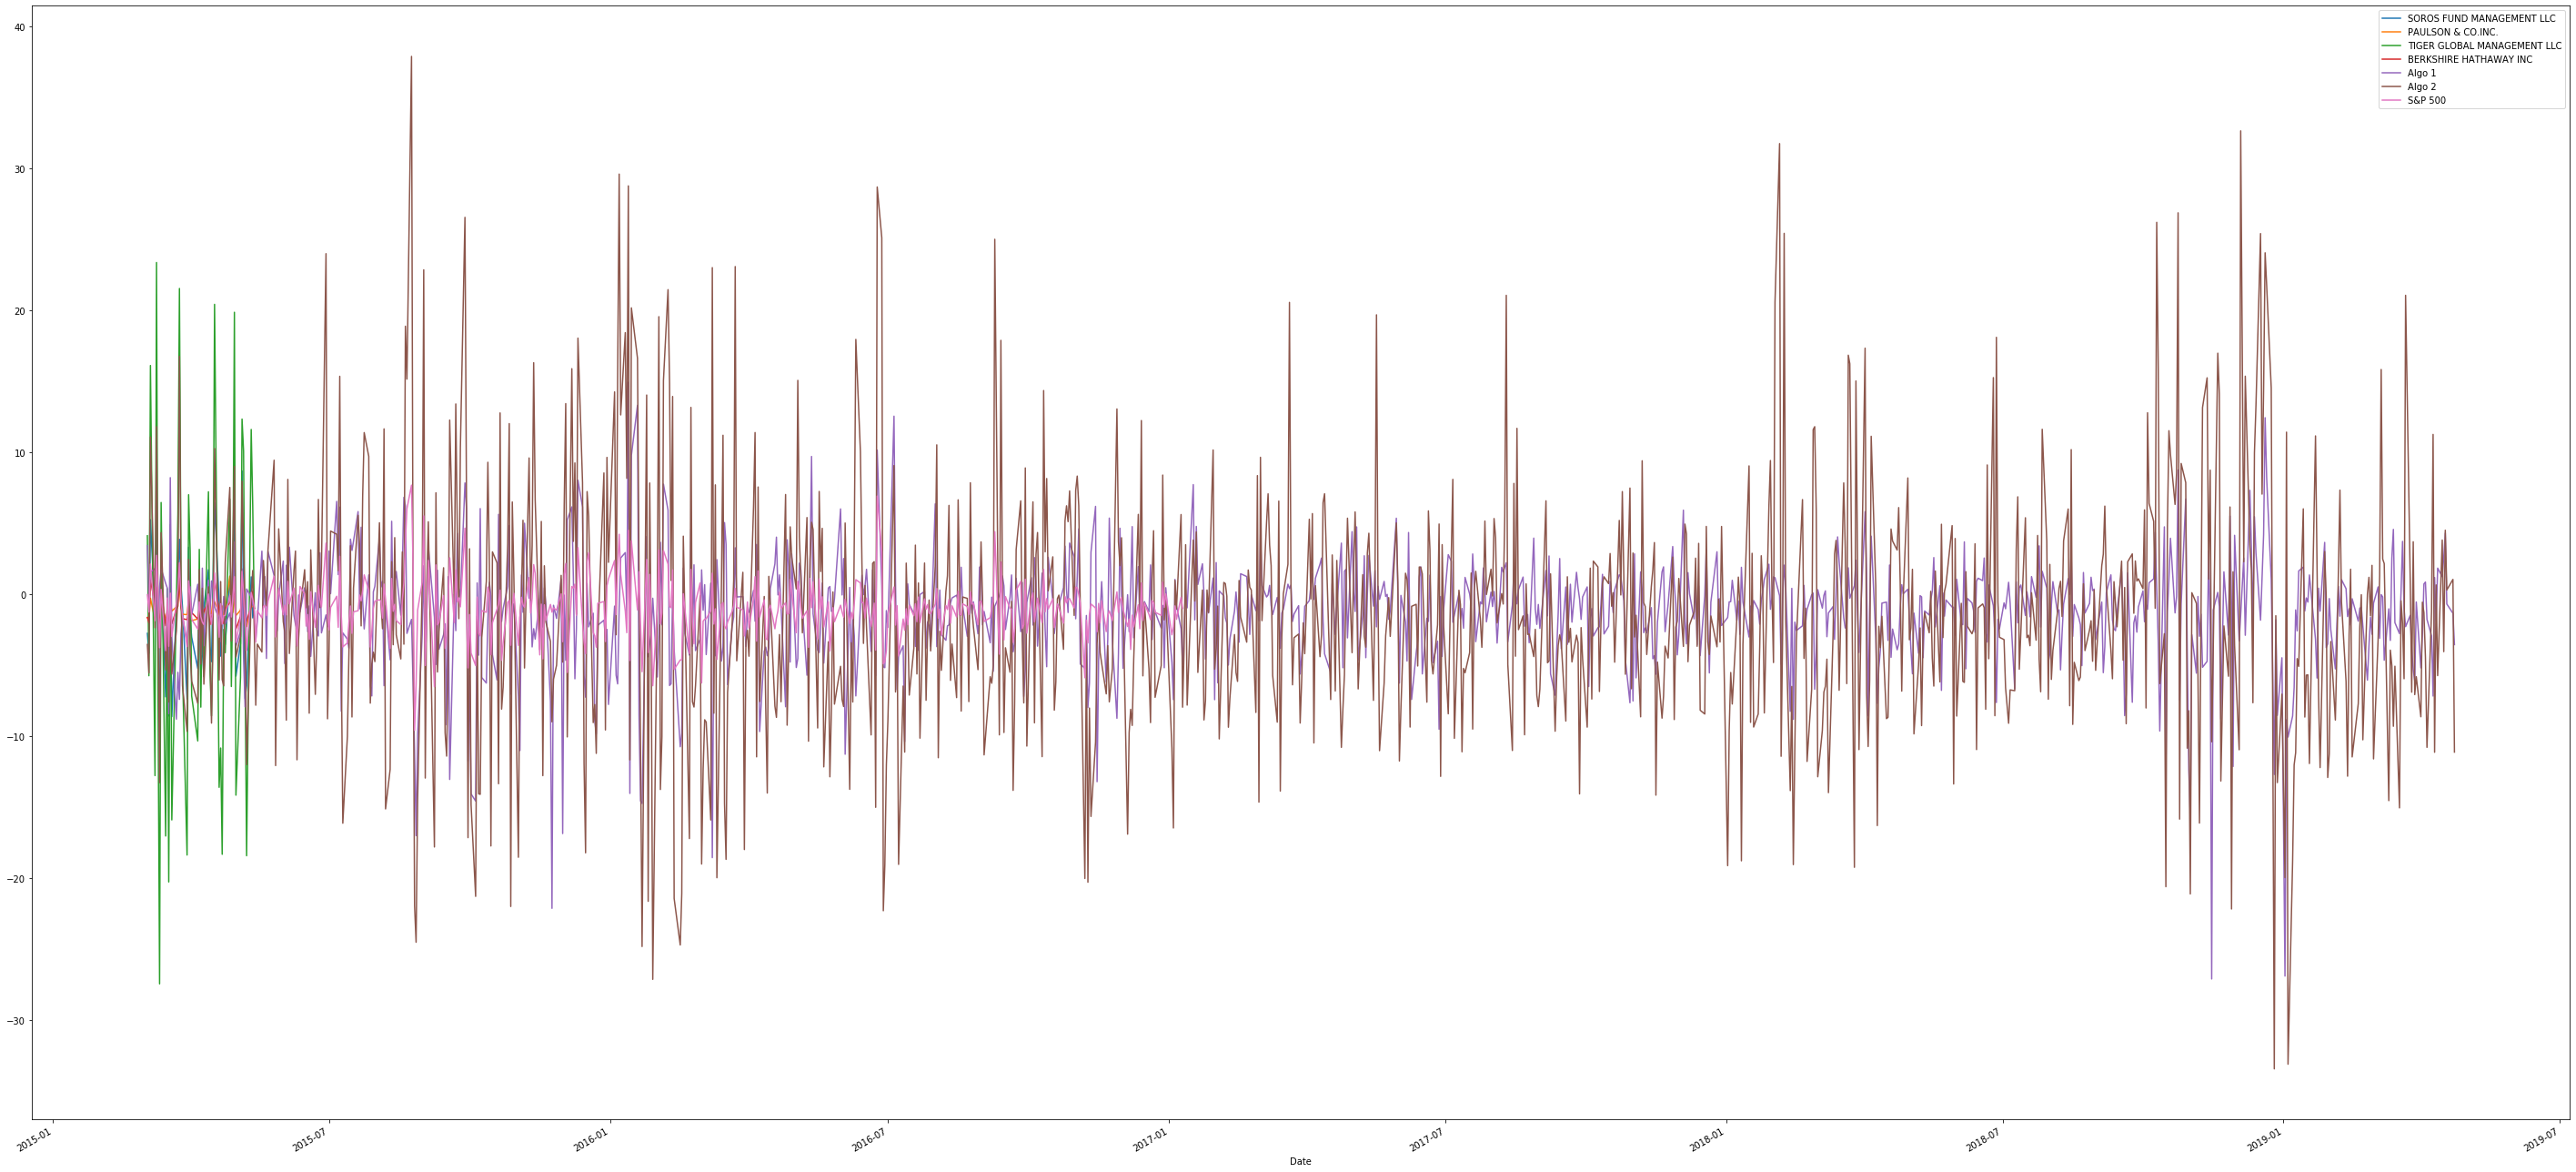

In [132]:
#determine the cumulative returns

cumulative_returns = (1 + daily_returns).cumprod() - 1

#plot the cumulative returns

cumulative_returns.plot()
plt.gcf().set_size_inches(50, 25)

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

In [ ]:
# COMPLETE FAIL HERE 

In [141]:
# calculate the daily standard deviations for all portfolios

complete_df.std()


SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [169]:
# Determine which portfolios are riskier than the S&P 500 and output the result as true or false



#I was unable to figure out how to do this, I kept getting the error that the result was a method
# and it wouldn't let me compare the result for individual colums. I also tried to read the cell above
# as a dataframe and it didn't work.

pandas.core.series.Series

In [142]:
# Calculate the annualized standard deviation (252 trading days)

annualized_sd = complete_df.std() * np.sqrt(252)
annualized_sd.sort_values(inplace=True)
annualized_sd

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P 500                        0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

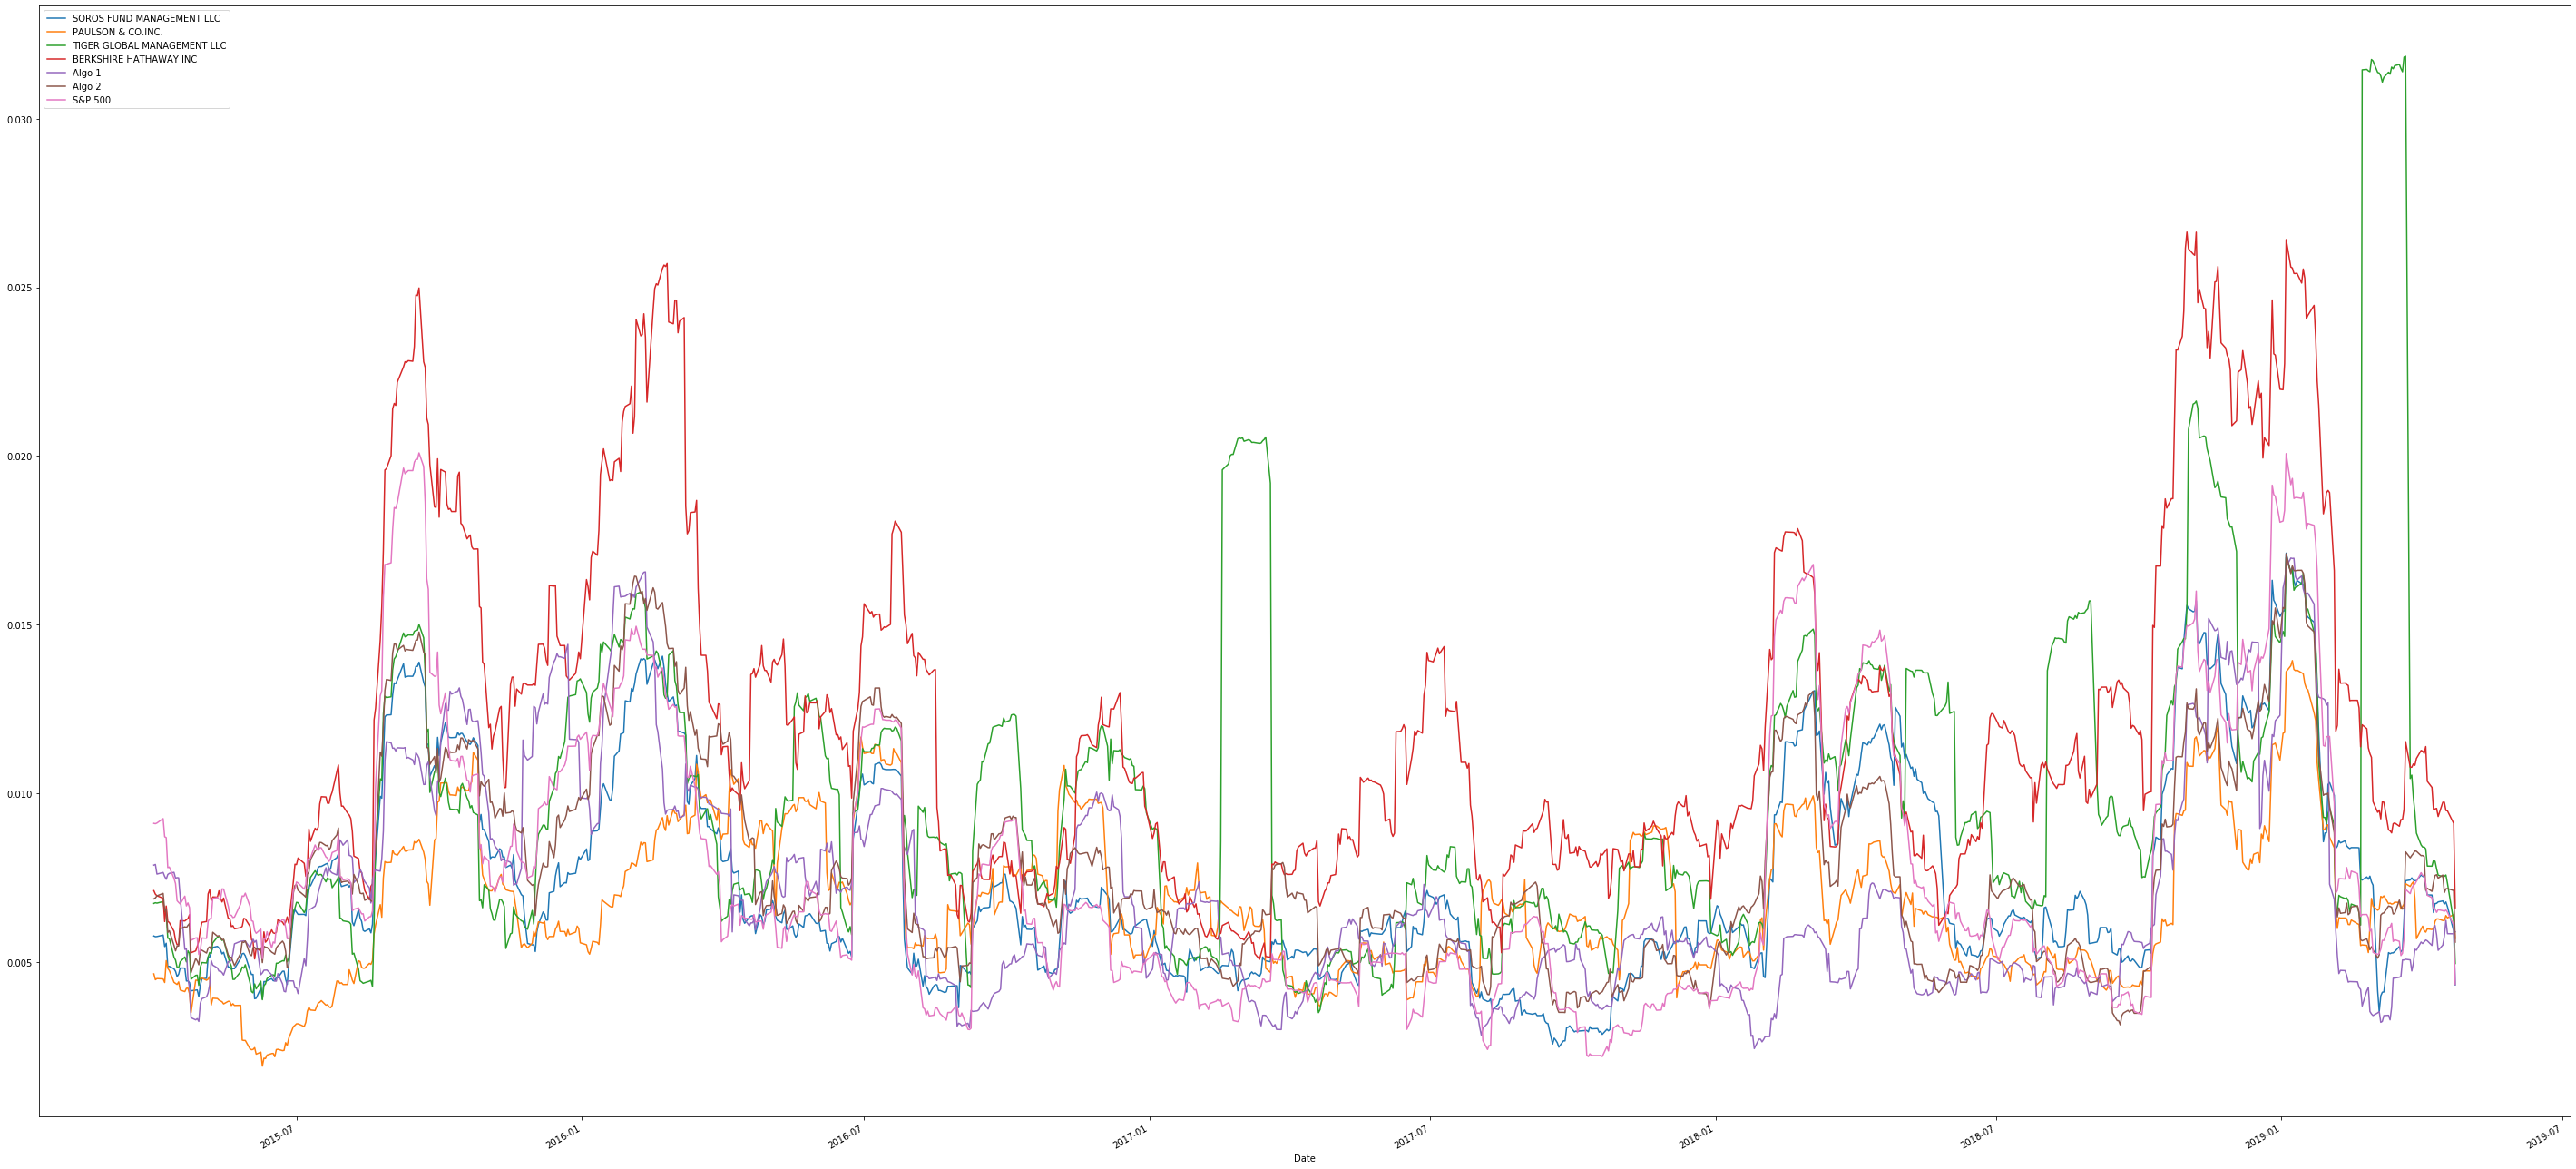

In [174]:
# Calculate rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window

complete_df_21_day_std = complete_df.rolling(window=21).std()

#plot it

complete_df_21_day_std.plot()
plt.gcf().set_size_inches(50, 25)

In [143]:
#create a correlation table using the corr function.

correlation = complete_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


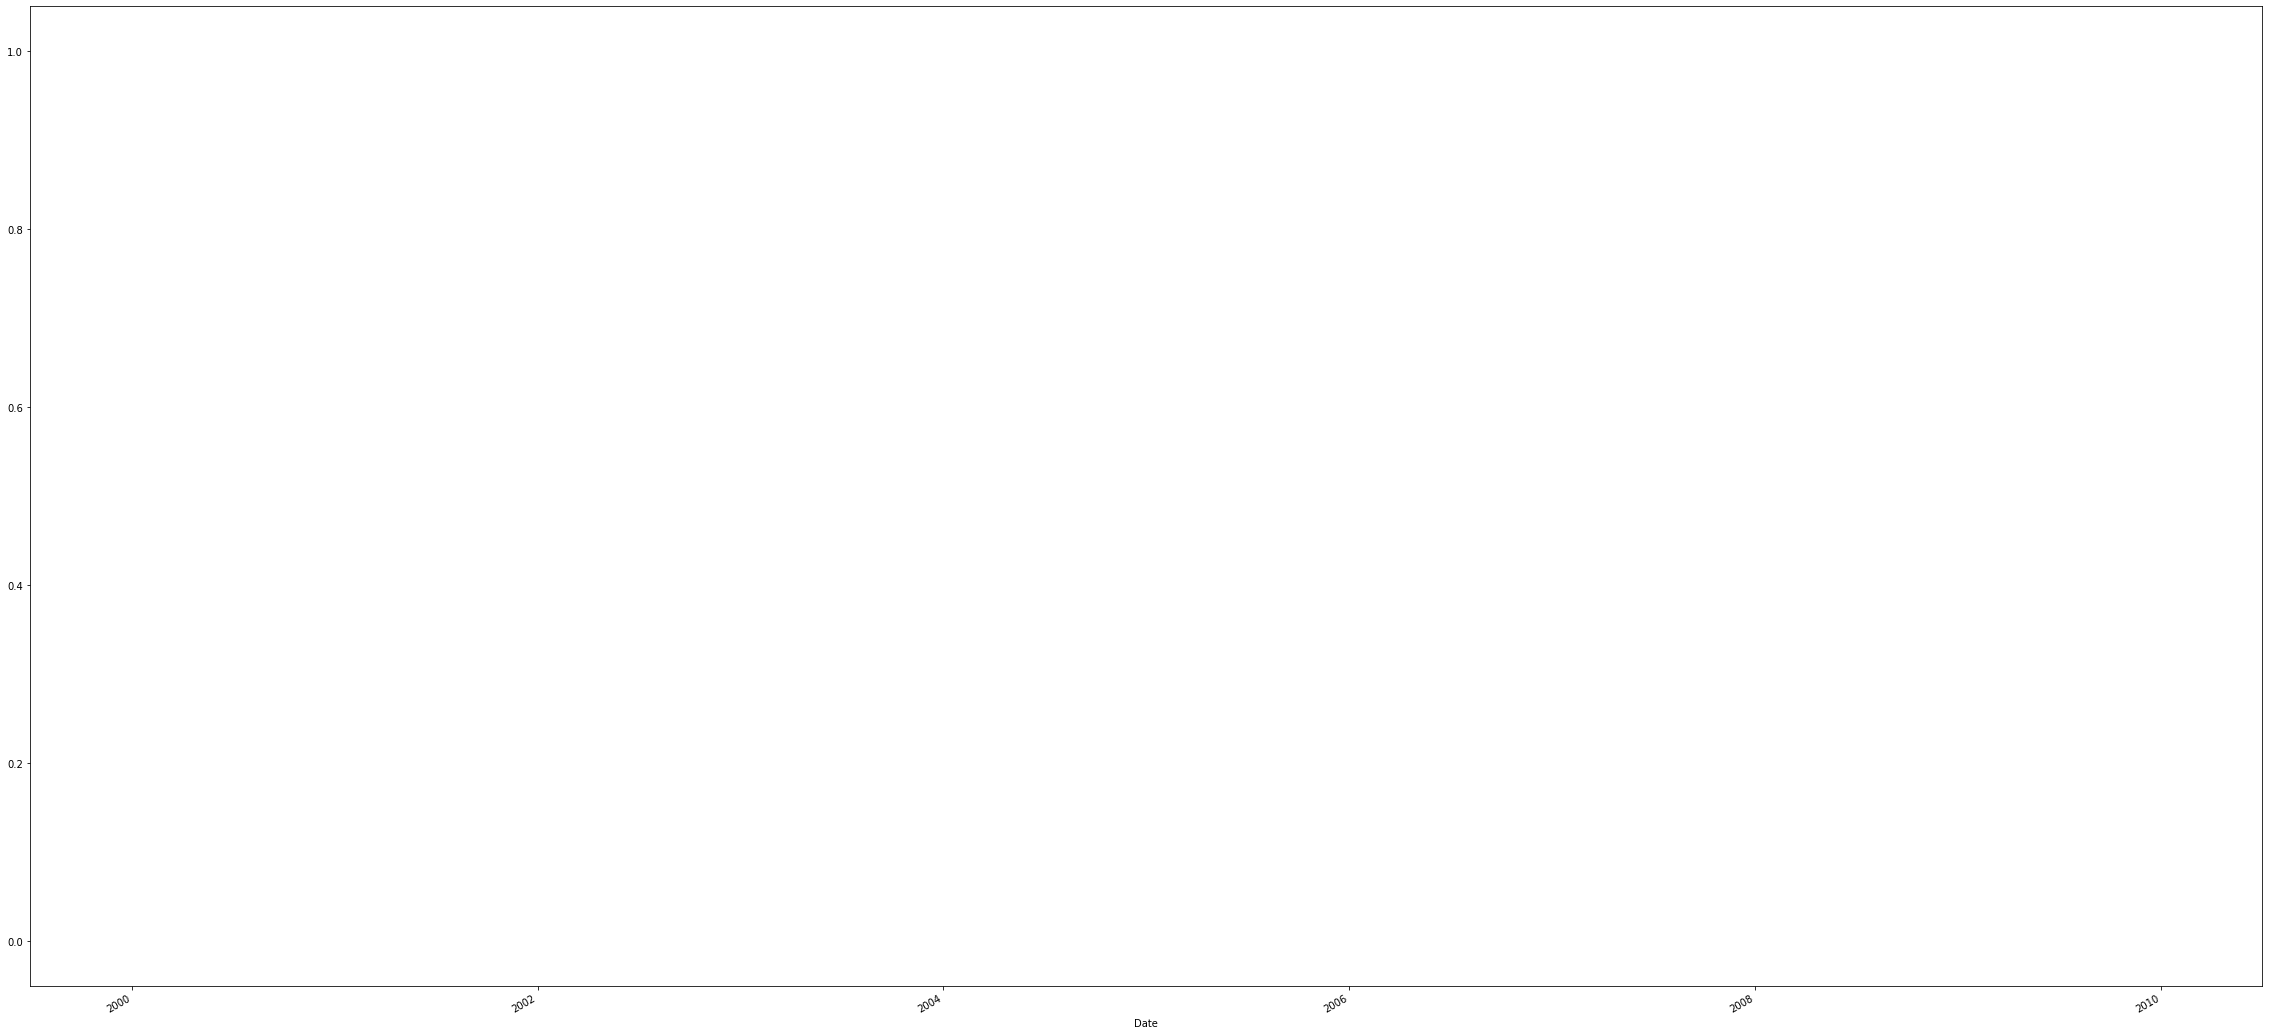

In [184]:
# Calculate Rolling Beta for a single portfolio compared to the total market (S&P 500)

# I am calculating beta for Algo 2 since it is the best investment. The Beta for Algo 2
# is the covariance between Algo 2 and the S&P 500 divided by the variance for the S&P500.

rolling_algo2_covariance = daily_returns['Algo 2'].rolling(window=1).cov(daily_returns['S&P 500'])
rolling_variance = daily_returns['S&P 500'].rolling(window=1).var()
rolling_algo2_beta = rolling_algo2_covariance / rolling_variance

rolling_algo2_beta.plot()
plt.gcf().set_size_inches(40, 20)

#I don't know why the data won't appear, it doesn't look better than the other graphs but 
#it flashes on the screen when I go to the next cell.

In [187]:
# Calculate a rolling window using the exponentially weighted moving average. 

#I found the ewm function, but it's not supported by rolling.


AttributeError: 'EWM' object has no attribute 'plot'

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [144]:
# Calculate annualized Sharpe Ratios 

sharpe_ratios = (complete_df.mean() * 252) / (complete_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

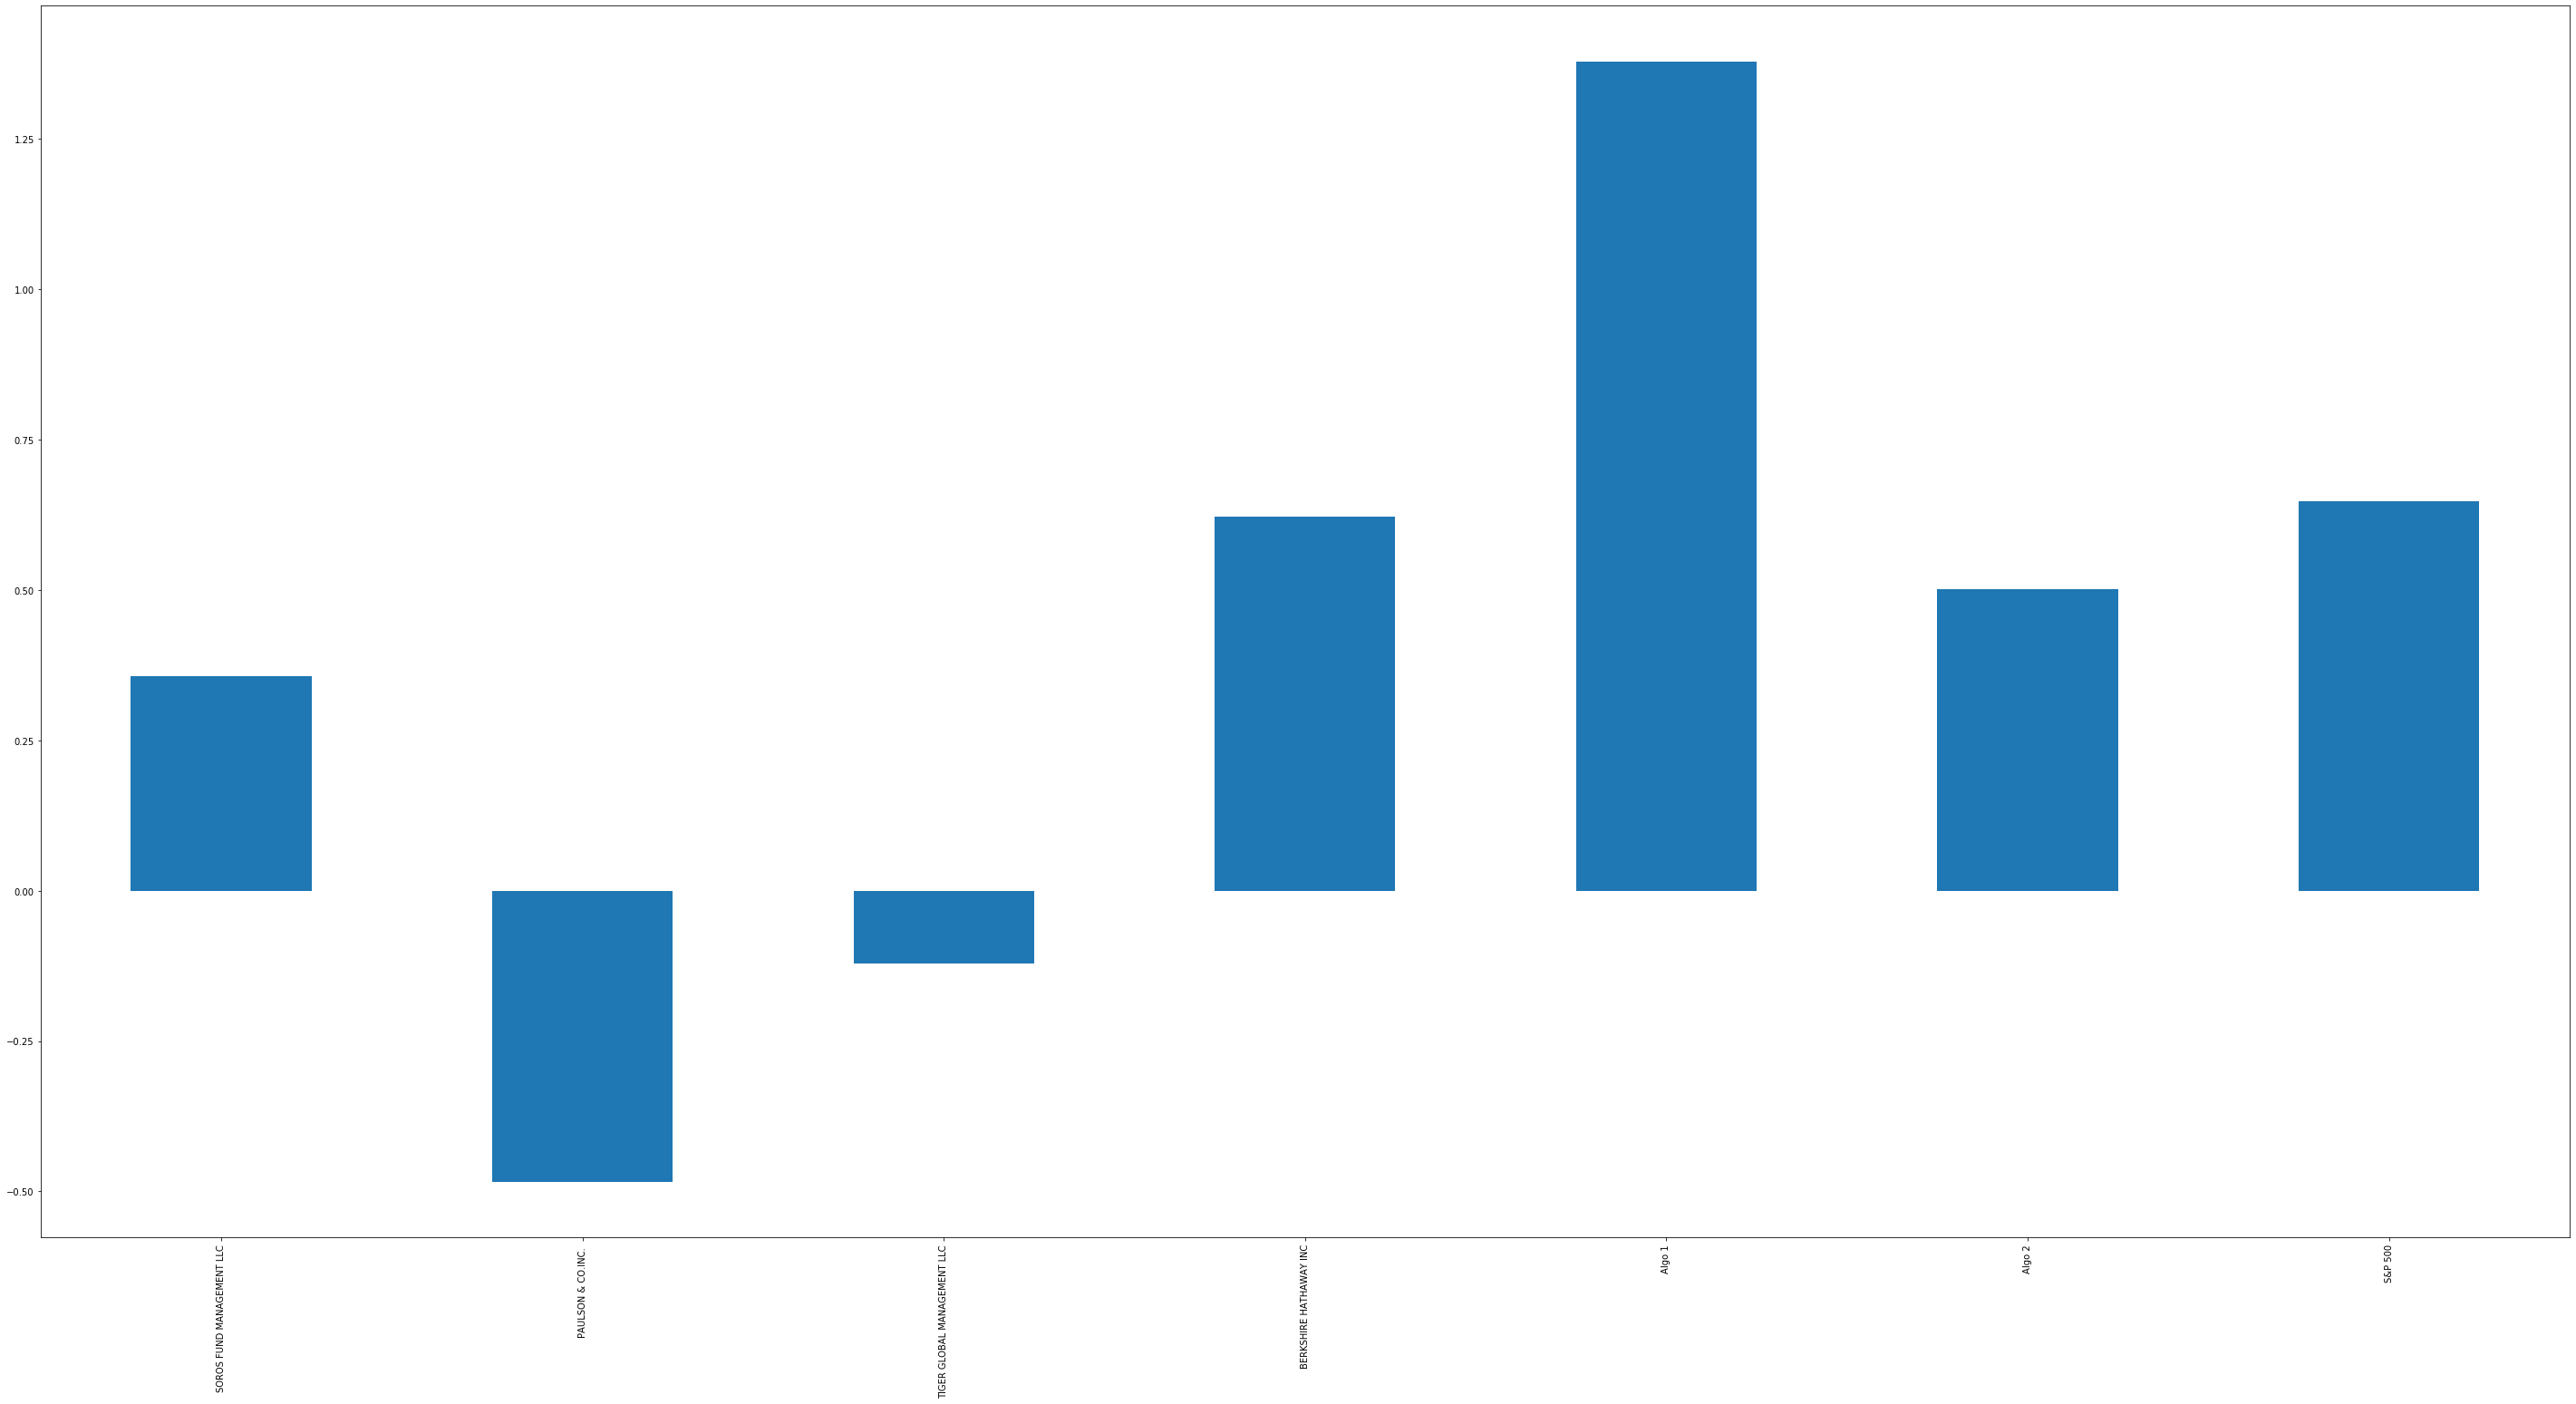

In [160]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot.bar()
plt.gcf().set_size_inches(50, 25)

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

Algo 1 has a sharpe ratio that's more than twice that of any of the other portfolios here, which means that the investor gets more than twice as much reward for the amount of risk they are taking on. This makes it the most attractive investment by far. Algo 2 underperforms the market but beats every whale except for Berkshire Hathaway.

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [10]:
# Set the path for the Amazon data. I got the same dates as the complete_df uses.

amazon_csv = Path("/Users/aaronbsechler/Desktop/AMZN.csv")

# Read the data as a csv file, set the index to the date, make the date format uniform.

amazon = pd.read_csv(amazon_csv, parse_dates=['Date'], dayfirst=True, index_col = 'Date')

#drop the unwanted columns

amazon.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'],inplace=True)

# Sort the data by date.

amazon.sort_index(inplace=True)

# Print the first five entries.

amazon.head()

,Close
Date,
2015-03-02,385.660004
2015-03-03,384.609985
2015-03-04,382.720001
2015-03-05,387.829987
2015-03-06,380.089996


In [11]:
# Set the path for the Tesla data
tesla_csv = Path("/Users/aaronbsechler/Desktop/TSLA.csv")

# Read the data as a csv file, set the index to the date, make the date format uniform.

tesla = pd.read_csv(tesla_csv, parse_dates=['Date'], dayfirst=True, index_col = 'Date')

#drop the unwanted columns

tesla.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'],inplace=True)

# Sort the data by date.

tesla.sort_index(inplace=True)

# Print the first five entries.

tesla.head()

,Close
Date,
2015-03-02,197.330002
2015-03-03,199.559998
2015-03-04,202.440002
2015-03-05,200.630005
2015-03-06,193.880005


In [13]:
# Set the path for the Old Dominion Freight Line data
odfl_csv = Path("/Users/aaronbsechler/Desktop/ODFL.csv")

# Read the data as a csv file, set the index to the date, make the date format uniform.

odfl = pd.read_csv(odfl_csv, parse_dates=['Date'], dayfirst=True, index_col = 'Date')

#drop the unwanted columns

odfl.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'],inplace=True)

# Sort the data by date.

odfl.sort_index(inplace=True)

# Print the first five entries.

odfl.head()

,Close
Date,
2015-03-03,52.020000
2015-03-04,51.766666
2015-03-05,51.766666
2015-03-06,51.673332
2015-03-09,51.833332


In [16]:
# Concatenate all stocks into a single DataFrame

custom_df = pd.concat([amazon, tesla, odfl], axis='columns', join="outer")
custom_df.columns = ['Amazon', 'Tesla', 'ODFL']
custom_df.head()

,Amazon,Tesla,ODFL
Date,,,
2015-03-02,385.660004,197.330002,NaN
2015-03-03,384.609985,199.559998,52.020000
2015-03-04,382.720001,202.440002,51.766666
2015-03-05,387.829987,200.630005,51.766666
2015-03-06,380.089996,193.880005,51.673332


In [32]:
# I think the way I imported the files makes this step unecessary
# YOUR CODE HERE

,Trade DATE,Symbol,NOCP
0,2018-05-11,GOOG,1098.26
1,2018-05-14,GOOG,1100.20
2,2018-05-15,GOOG,1079.23
3,2018-05-16,GOOG,1081.77
4,2018-05-17,GOOG,1078.59


In [33]:
# I think the way I imported the files makes this step unecessary.
# YOUR CODE HERE

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [19]:
# Drop Nulls
custom_df.dropna(inplace=True)

custom_df.isnull().sum()



Amazon    0
Tesla     0
ODFL      0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [37]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]

#first calculate the daily returns

daily_returns = custom_df.pct_change()

#now calculate the daily returns

custom_returns = daily_returns.dot(weights)
custom_returns.head()

Date
2015-03-03         NaN
2015-03-04    0.001549
2015-03-05    0.001470
2015-03-06   -0.018468
2015-03-09   -0.005467
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [69]:
# Add your "Custom" portfolio to the larger dataframe of fund returns 

more_complete_df = pd.concat([complete_df, custom_returns], axis='columns', join="inner")

more_complete_df.rename(columns={ more_complete_df.columns[-0]: "Custom" }, inplace = True)

#I do not know why the above code does not rename the column.

final_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,0
Date,,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,0.001549
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.001470
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.018468
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,-0.005467
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961,-0.012977


In [58]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

final_df.dropna(inplace=True)

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [60]:
# Risk

more_complete_df.std()



SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
0                              0.015417
dtype: float64

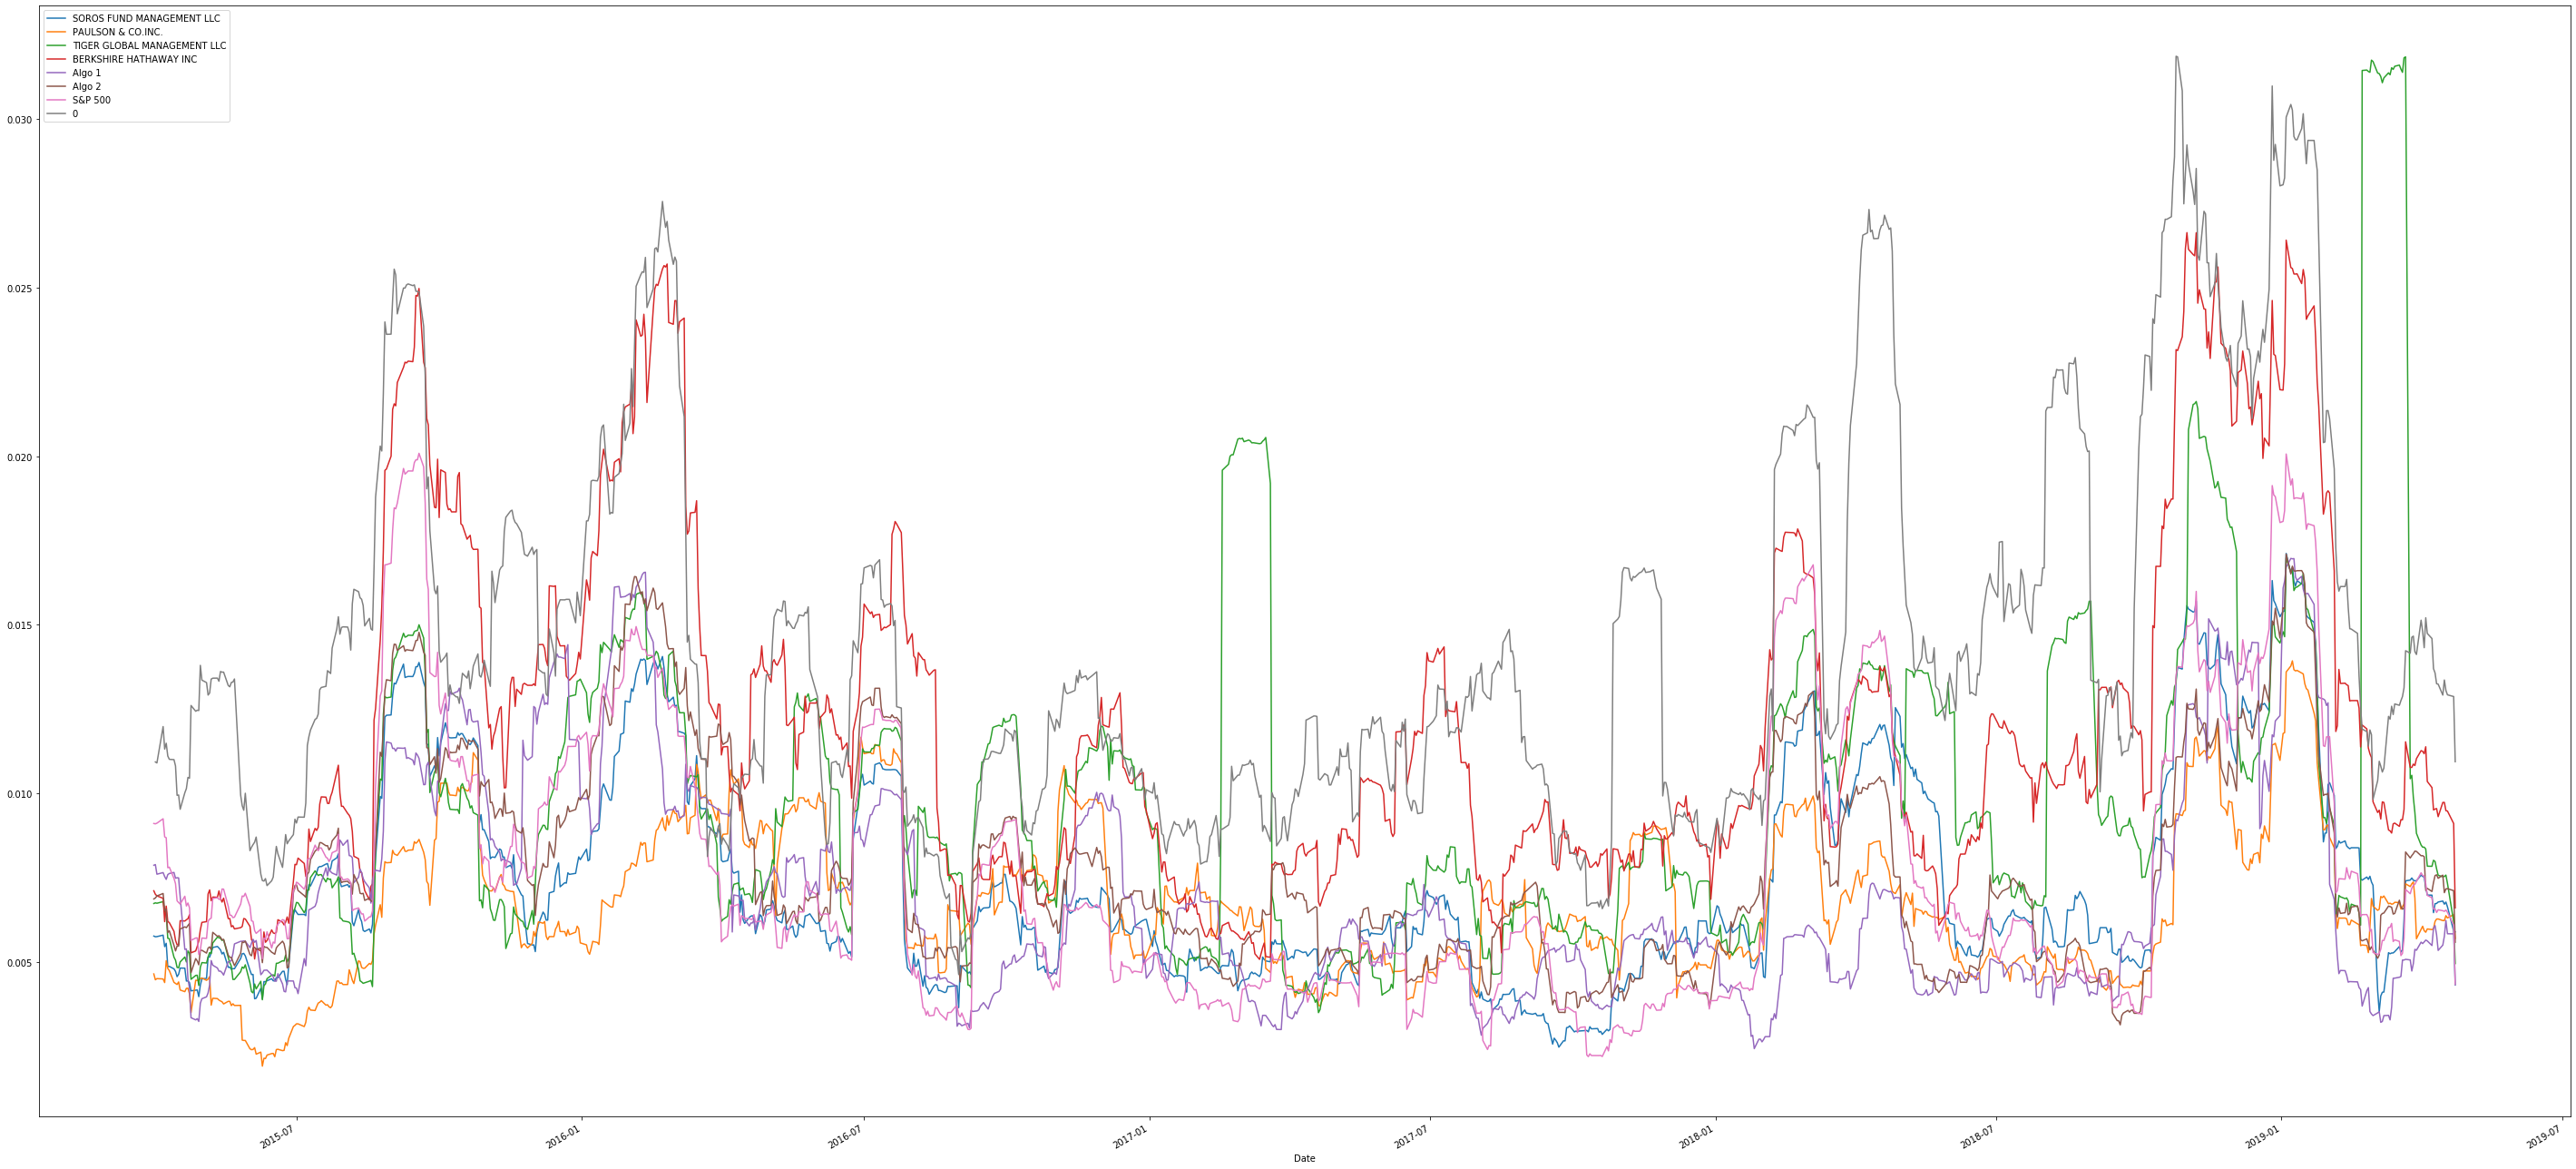

In [61]:
# Rolling

# Calculate rolling standard deviation for
# the more_complete_df using a 21 trading day window

more_complete_df_21_day_std = more_complete_df.rolling(window=21).std()

#plot it

more_complete_df_21_day_std.plot()
plt.gcf().set_size_inches(50, 25)

In [63]:
# Annualized Sharpe Ratios

more_complete_sharpe_ratios = (more_complete_df.mean() * 252) / (more_complete_df.std() * np.sqrt(252))
more_complete_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
0                              1.088195
dtype: float64

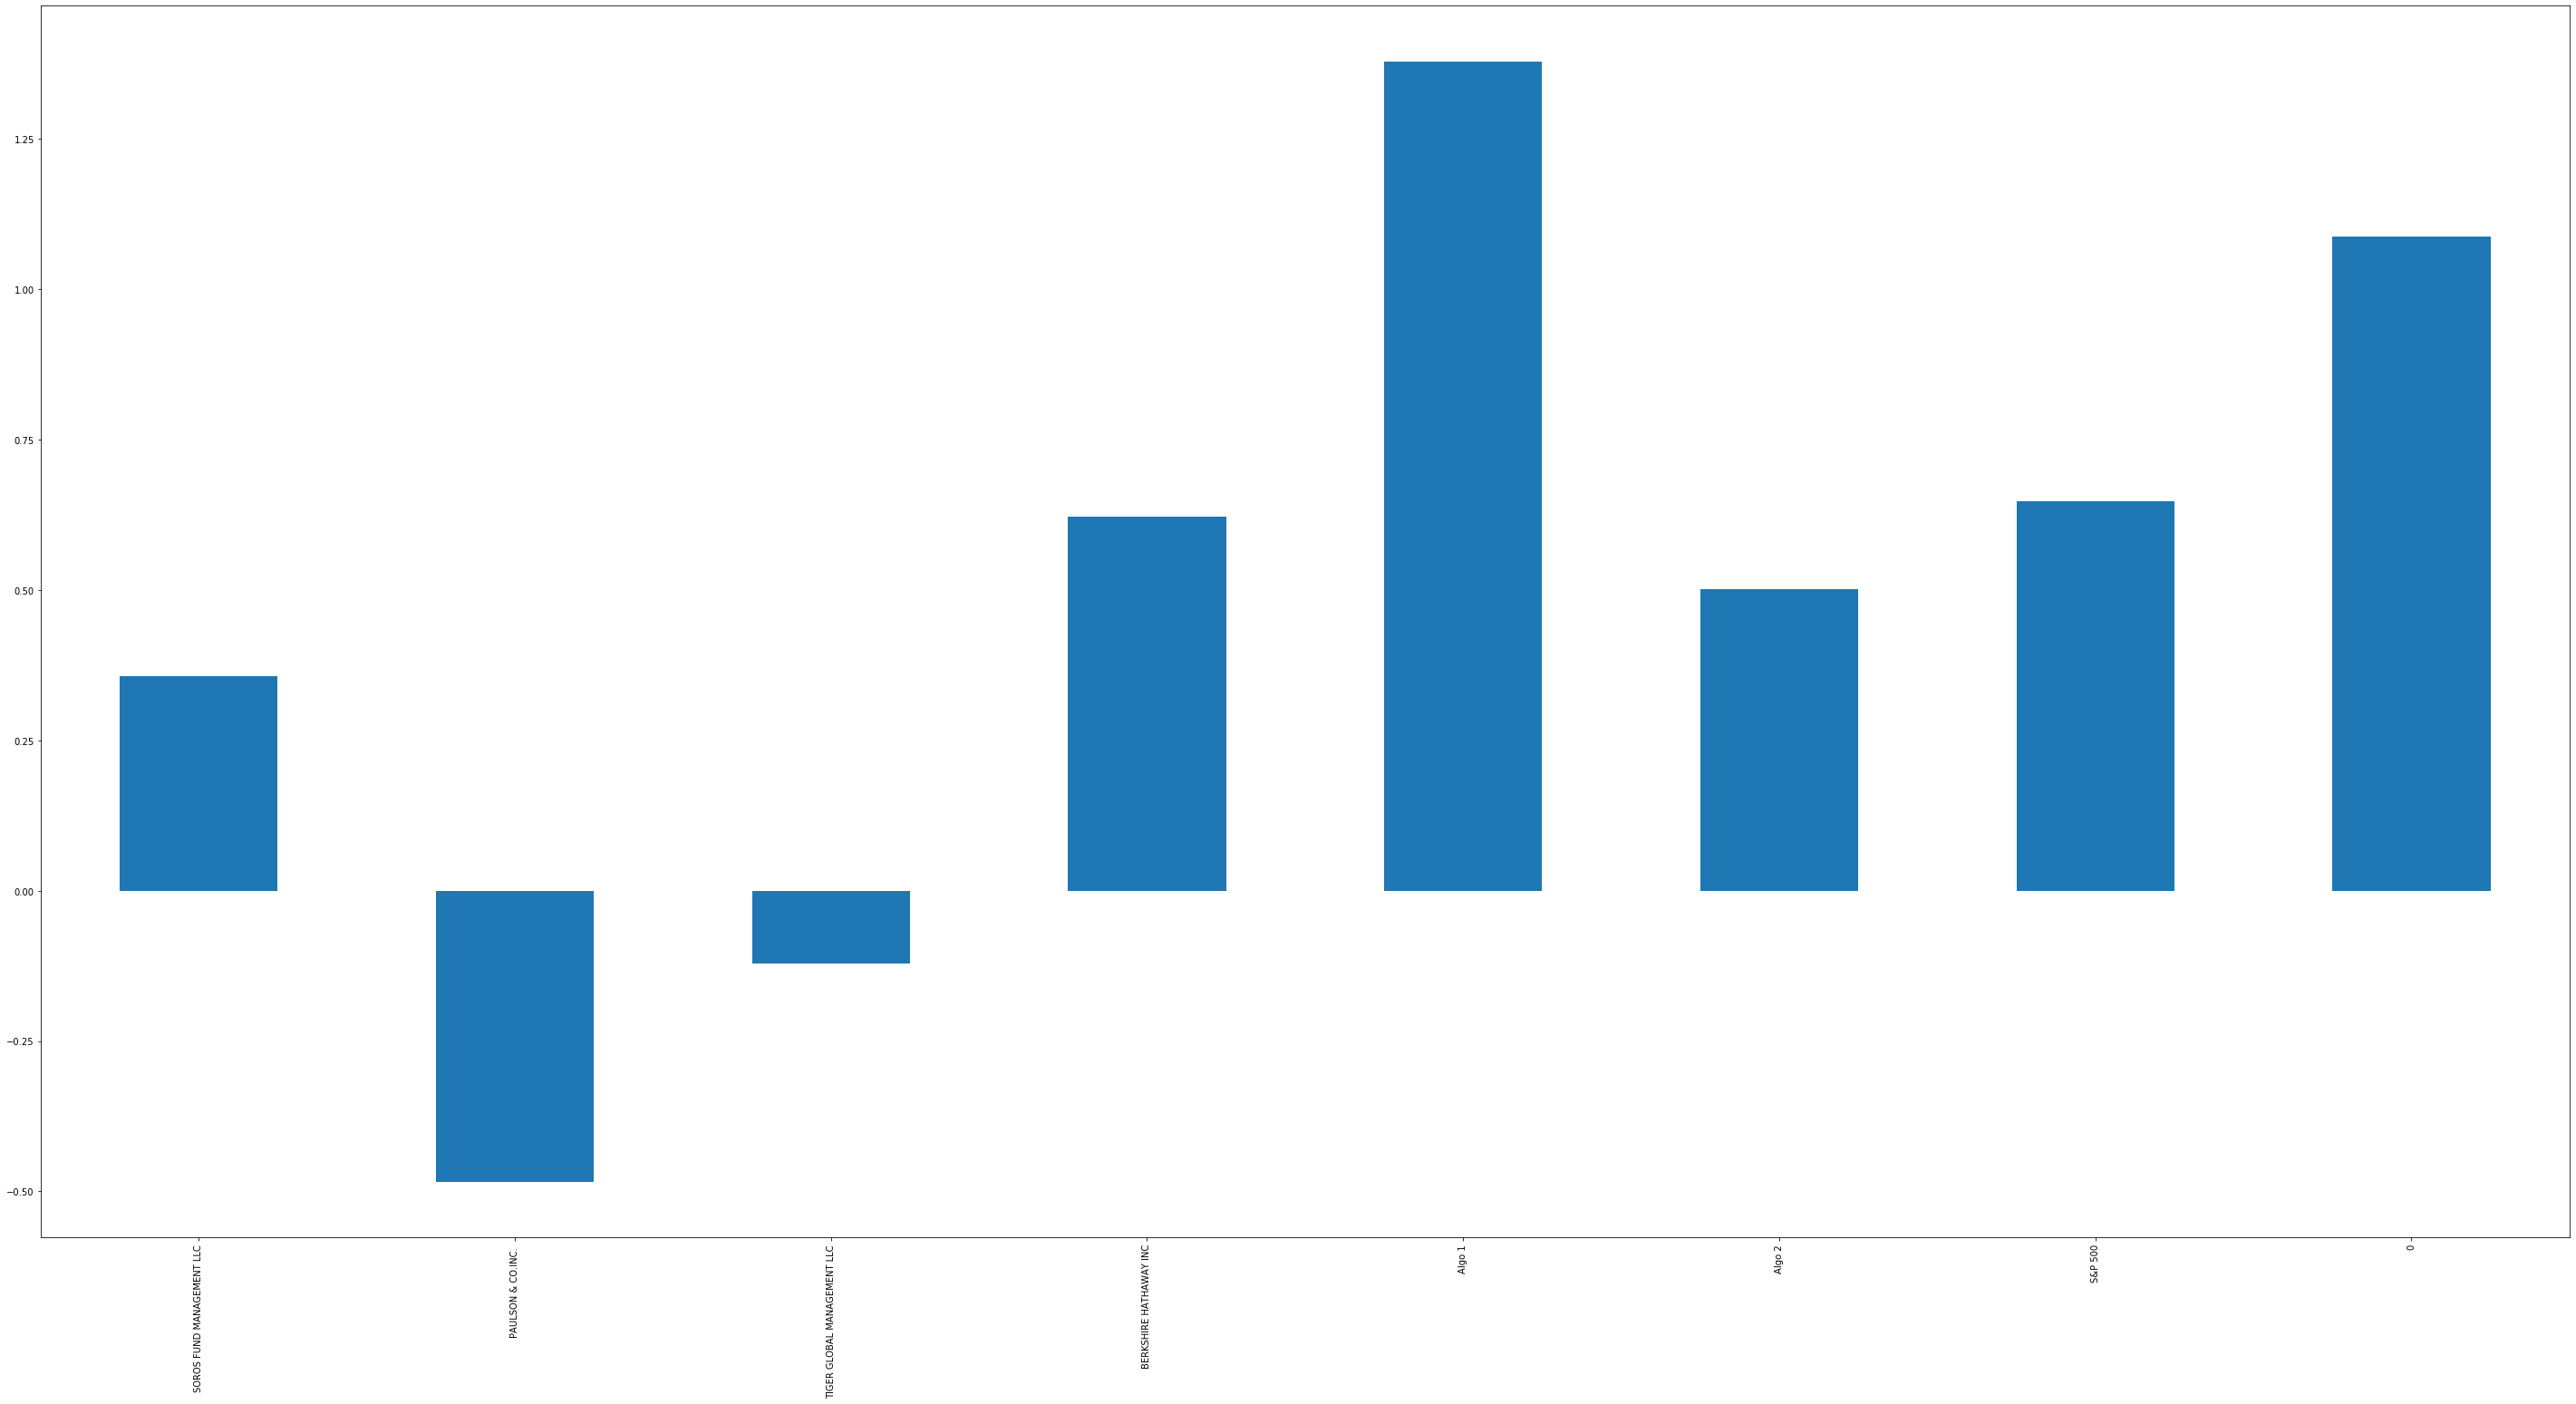

In [64]:
# Visualize the sharpe ratios as a bar plot

more_complete_sharpe_ratios.plot.bar()
plt.gcf().set_size_inches(50, 25)

In [65]:
# Create a correlation analysis

more_correlation = more_complete_df.corr()
more_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,0
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864,0.609239
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732,0.449989
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946,0.413355
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371,0.644609
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494,0.231552
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764,0.616882
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000,0.693118
0,0.609239,0.449989,0.413355,0.644609,0.231552,0.616882,0.693118,1.000000


In [70]:
# Beta

# I am calculating beta for my custom portfolio against the S&P 500. 

rolling_custom_covariance = daily_returns['0'].rolling(window=1).cov(daily_returns['S&P 500'])
rolling_variance = daily_returns['S&P 500'].rolling(window=1).var()
rolling_custom_beta = rolling_algo2_covariance / rolling_variance

rolling_custom_beta.plot()
plt.gcf().set_size_inches(40, 20)

#this won't work because it can't read the name of the column I can't rename.

KeyError: 0